# Unsupervised to Supervised Learning

Even though they are different disciplines, supervised and unsupervised learning are interestingly closesly related.

This notebook illustrates how the task of density estimation (inherently unsupervised) can be converted into a regression (supervised). To do so, a second (auxiliary) density is defined. This auxiliary density models the background, whereas the original density models the object (image in this case) that has some interest.

Then, the regression task is to fit one function that represents both distributions, with high values in regions where our actual samples dominate, and with low values in regions where the background dominates. This regression can be performed using several different methods, but here a Random Forest Regressor fromk *sklearn* is used

This notebook just illustrates functionality, the methods called can be found in the *unsupervised_to_supervised.py* file

<img src="images/random_forest.png" alt="Drawing" style="width: 400px;"/>

In [1]:
import sklearn.ensemble as ensemble
from matplotlib import pyplot as plt

from unsupervised_to_supervised import Unsupervised_to_Supervised

## Computing and Displaying densities

The first task is to sample our primary and auxliary secondary densities and to assign them correct labels/values

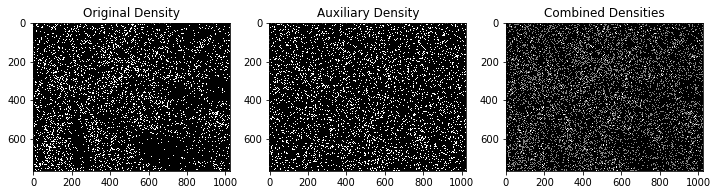

In [2]:
sigma = 3
n_samples = 100000

converter = Unsupervised_to_Supervised(sigma=sigma)
racoonSamples,_ = converter.getSamples(n_samples)
BackgroundSamples, _ = converter.getBackgroundSamples(n_samples)
converter.displayDensities()

## Training amd Testing the Random Forest Regressor
With an adecuate selection of parameters, the trick of using two distributions helps us estimate quite accurately the original distribution using a regulare regressor.

In [3]:
number_trees = 30
max_depth = 12

converter.RandomForestRegressorTrain(n_trees=number_trees, max_depth=max_depth, mode="ExtraTrees")
reconstruction = converter.RandomForestRegressorTest()

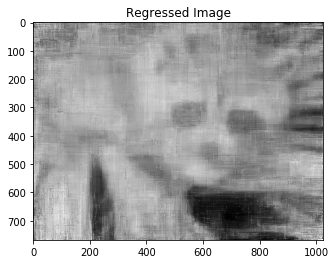

In [4]:
plt.figure()
plt.imshow( reconstruction, cmap="gray" )
plt.title("Regressed Image")
plt.show()

## Model Selection Problem

Unfortunately, the model selection problem is also present in this task. 
In order to get good results, a good selection of the parameters (number of trees and tree depth) must be selected. Furthermore, the typy of tree regressor used also affects the results.

On the one hand, if the tree depth is too shallow (for example 5), the trees will not be able to capture the complexity of the distribution. The leaves will average large areas of the image, thus causing a heavy smoothing effect. Therefore, the distribution will not be accurately approximated. The model is **underfitting**

On the other hand, with a depth that is too large (for example 45), the leaves of the tree will just fit very few (or maybe even just one) pixels. Therefore, the tree will just memorize the training data and it will look up the memorized values when predicting. This results in granular distribution as neighboring pixels might be significantly different. The model is **overfitting**.

In [5]:
number_trees = 30
converter.RandomForestRegressorTrain(n_trees=number_trees, max_depth=5, mode="ExtraTrees")
reconstruction1 = converter.RandomForestRegressorTest()
converter.RandomForestRegressorTrain(n_trees=number_trees, max_depth=15, mode="ExtraTrees")
reconstruction2 = converter.RandomForestRegressorTest()
converter.RandomForestRegressorTrain(n_trees=number_trees, max_depth=45, mode="ExtraTrees")
reconstruction3 = converter.RandomForestRegressorTest()

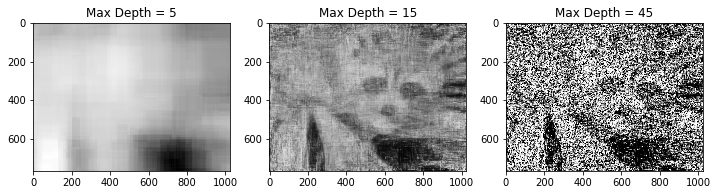

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow( reconstruction1, cmap="gray" )
plt.title("Max Depth = 5")
plt.subplot(1,3,2)
plt.imshow( reconstruction2, cmap="gray" )
plt.title("Max Depth = 15")
plt.subplot(1,3,3)
plt.imshow( reconstruction3, cmap="gray" )
plt.title("Max Depth = 45")
plt.show()

Another relevant parameter is the amount of trees averaged in the forest.

As shown in the following figures, averaging more trees result (in general) in smoother and more accurate distributions. 

Unfortunately, there amount of computations needed grow (linearly) with the number of trees. If the number of trees is extremely high, they will not be different enough and overfitting might also be possible.

In [7]:
max_depth = 15

converter.RandomForestRegressorTrain(n_trees=5, max_depth=max_depth, mode="ExtraTrees")
reconstruction1 = converter.RandomForestRegressorTest()
converter.RandomForestRegressorTrain(n_trees=30, max_depth=max_depth, mode="ExtraTrees")
reconstruction2 = converter.RandomForestRegressorTest()
converter.RandomForestRegressorTrain(n_trees=120, max_depth=max_depth, mode="ExtraTrees")
reconstruction3 = converter.RandomForestRegressorTest()

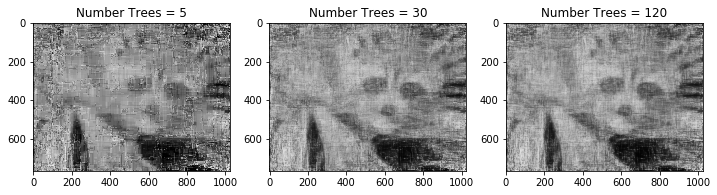

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow( reconstruction1, cmap="gray" )
plt.title("Number Trees = 5")
plt.subplot(1,3,2)
plt.imshow( reconstruction2, cmap="gray" )
plt.title("Number Trees = 30")
plt.subplot(1,3,3)
plt.imshow( reconstruction3, cmap="gray" )
plt.title("Number Trees = 120")
plt.show()